See source: 
https://kyso.io/eoin/openai-gym-jupyter

## OpenAI Gym Space Invaders in Jupyter notebooks
First lets save the simulation as an mp4 and save it at the end. This method makes the simulation faster since there is no visualising happening every step. In this simulation we just make the space ship take a random move each step.

In [2]:
import gym
from gym import wrappers

env = gym.make('CartPole-v1')
env = wrappers.Monitor(env, "./gym-results", force=True)
env.reset()
for _ in range(1000000):
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    if done: break
env.close()

In [3]:
import io
import base64
from IPython.display import HTML

video = io.open('./gym-results/openaigym.video.%s.video000000.mp4' % env.file_infix, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''
    <video width="360" height="auto" alt="test" controls><source src="data:video/mp4;base64,{0}" type="video/mp4" /></video>'''
.format(encoded.decode('ascii')))

## Show as gif in realtime
This method is useful for look at the simulation in realtime, but it does make the simulation take longer. It does not save the gif, but if you run this cell you will the image change as the simulation progresses.

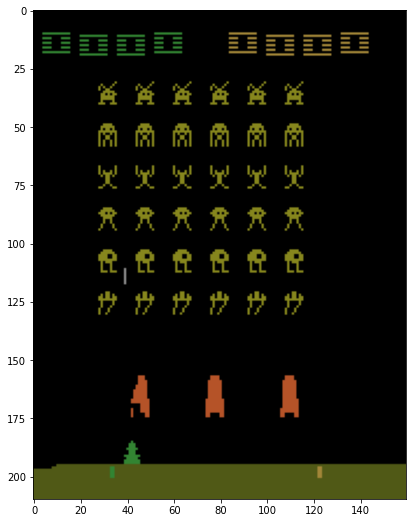

In [3]:
import gym
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

env = gym.make('SpaceInvaders-v0')
env.reset()
plt.figure(figsize=(9,9))
img = plt.imshow(env.render(mode='rgb_array')) # only call this once
for _ in range(100):
    img.set_data(env.render(mode='rgb_array')) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)
    action = env.action_space.sample()
    env.step(action)
env.close()